# Group 31: Xinyu Xiong, Yueling Feng, Yuxin Yang, Yixuan Deng

## Telework rate based on the races

## Data from  https://www.epi.org/blog/black-and-hispanic-workers-are-much-less-likely-to-be-able-to-work-from-home/

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_excel("/Users/apple/Desktop/ network data(1).xlsx")
df = df.drop(labels=[3,4],axis=0)
df = df.drop("Column1",axis=1)
df

,Race/ethnicity,Able to telework
0,White,0.299
1,Black or African American,0.197
2,Asian,0.370


Text(0.5, 1.0, 'Percentage of workers who can telework by race from 2017 to 2018')

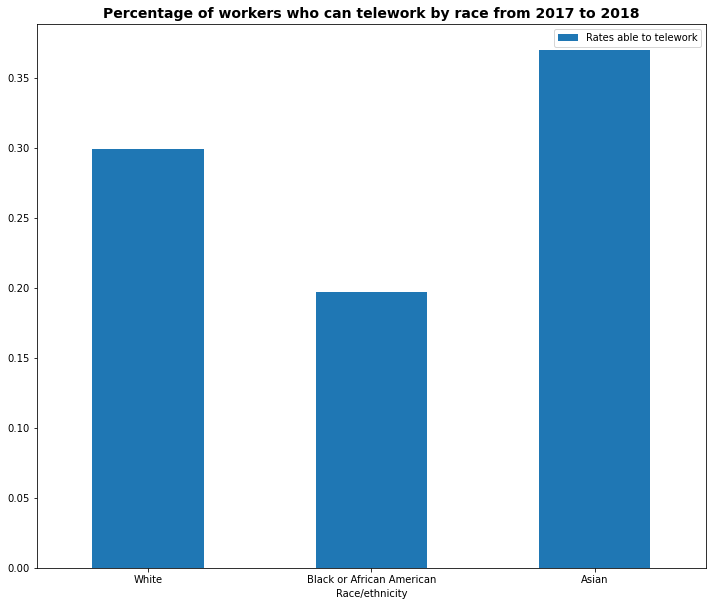

In [42]:

df = pd.DataFrame({'Race/ethnicity':['White', 'Black or African American', 'Asian'], 'Rates able to telework':[0.299, 0.197, 0.370]})
df.plot.bar(x='Race/ethnicity', y='Rates able to telework', rot=0,figsize=(12,10))
plt.title("Percentage of workers who can telework by race from 2017 to 2018", fontweight ='bold', fontsize = 14)


## Hospitalization
### Data: https://gis.cdc.gov/grasp/COVIDNet/COVID19_3.html

In [20]:
df1 = pd.read_excel("/Users/apple/Desktop/ COVID-19Surveillance_All_Data 1.xlsx")
df1 = df1.drop(["CATCHMENT","YEAR","NETWORK","AGE CATEGORY","SEX","CUMULATIVE RATE"], axis=1)
df1

,MMWR-YEAR,MMWR-WEEK,RACE,WEEKLY RATE
0,2020,10,White,0.1
1,2020,10,Black,0.2
2,2020,10,Hispanic/Latino,0.1
3,2020,10,Asian/Pacific Islander,0.1
4,2020,10,American Indian/Alaska Native,0.0
...,...,...,...,...
320,2021,21,White,1.5
321,2021,21,Black,3.0
322,2021,21,Hispanic/Latino,2.3
323,2021,21,Asian/Pacific Islander,0.7


In [21]:
white = df1[df1.RACE== "White"]
white = white.reset_index()
white = white.drop(["index", "RACE"], axis="columns")
white

,MMWR-YEAR,MMWR-WEEK,WEEKLY RATE
0,2020,10,0.1
1,2020,11,0.4
2,2020,12,1.9
3,2020,13,4.7
4,2020,14,6.0
...,...,...,...
60,2021,17,5.5
61,2021,18,5.3
62,2021,19,3.9
63,2021,20,3.3


In [22]:
black = df1[df1.RACE== "Black"]
black = black.reset_index()
black = black.drop(["index", "RACE"], axis="columns")
black

,MMWR-YEAR,MMWR-WEEK,WEEKLY RATE
0,2020,10,0.2
1,2020,11,1.4
2,2020,12,6.9
3,2020,13,17.4
4,2020,14,19.8
...,...,...,...
60,2021,17,13.9
61,2021,18,11.3
62,2021,19,8.8
63,2021,20,7.1


In [23]:
HL = df1[df1.RACE== "Hispanic/Latino"]
HL = HL.reset_index()
HL = HL.drop(["index", "RACE"], axis="columns")
HL

,MMWR-YEAR,MMWR-WEEK,WEEKLY RATE
0,2020,10,0.1
1,2020,11,0.6
2,2020,12,2.4
3,2020,13,7.4
4,2020,14,10.8
...,...,...,...
60,2021,17,7.7
61,2021,18,7.0
62,2021,19,5.4
63,2021,20,4.9


In [24]:
AP = df1[df1.RACE== "Asian/Pacific Islander"]
AP = AP.reset_index()
AP = AP.drop(["index", "RACE"], axis="columns")
AP

,MMWR-YEAR,MMWR-WEEK,WEEKLY RATE
0,2020,10,0.1
1,2020,11,0.6
2,2020,12,1.6
3,2020,13,4.2
4,2020,14,4.9
...,...,...,...
60,2021,17,3.3
61,2021,18,2.2
62,2021,19,1.8
63,2021,20,1.1


In [25]:
AA = df1[df1.RACE== "American Indian/Alaska Native"]
AA = AA.reset_index()
AA = AA.drop(["index", "RACE"], axis="columns")
AA

,MMWR-YEAR,MMWR-WEEK,WEEKLY RATE
0,2020,10,0.0
1,2020,11,0.9
2,2020,12,0.9
3,2020,13,6.5
4,2020,14,10.7
...,...,...,...
60,2021,17,9.3
61,2021,18,13.9
62,2021,19,11.1
63,2021,20,12.5


In [26]:
COUNT = white
COUNT = COUNT.rename(columns = {"WEEKLY RATE ": "White"}) 
COUNT = COUNT.drop(["MMWR-YEAR", "MMWR-WEEK"], axis = "columns")
COUNT

,White
0,0.1
1,0.4
2,1.9
3,4.7
4,6.0
...,...
60,5.5
61,5.3
62,3.9
63,3.3


In [27]:
black = black.rename(columns = {"WEEKLY RATE ": "Black"})
date = pd.DataFrame(black["Black"])
COUNT = COUNT.join(date)
COUNT

,White,Black
0,0.1,0.2
1,0.4,1.4
2,1.9,6.9
3,4.7,17.4
4,6.0,19.8
...,...,...
60,5.5,13.9
61,5.3,11.3
62,3.9,8.8
63,3.3,7.1


In [28]:
HL = HL.rename(columns = {"WEEKLY RATE ": "Hispanic/Latino"})
date = pd.DataFrame(HL["Hispanic/Latino"])
COUNT = COUNT.join(date)
COUNT

,White,Black,Hispanic/Latino
0,0.1,0.2,0.1
1,0.4,1.4,0.6
2,1.9,6.9,2.4
3,4.7,17.4,7.4
4,6.0,19.8,10.8
...,...,...,...
60,5.5,13.9,7.7
61,5.3,11.3,7.0
62,3.9,8.8,5.4
63,3.3,7.1,4.9


In [29]:
AP = AP.rename(columns = {"WEEKLY RATE ": "Asian/Pacific Islander"})
date = pd.DataFrame(AP["Asian/Pacific Islander"])
COUNT = COUNT.join(date)
COUNT

,White,Black,Hispanic/Latino,Asian/Pacific Islander
0,0.1,0.2,0.1,0.1
1,0.4,1.4,0.6,0.6
2,1.9,6.9,2.4,1.6
3,4.7,17.4,7.4,4.2
4,6.0,19.8,10.8,4.9
...,...,...,...,...
60,5.5,13.9,7.7,3.3
61,5.3,11.3,7.0,2.2
62,3.9,8.8,5.4,1.8
63,3.3,7.1,4.9,1.1


In [30]:
AA = AA.rename(columns = {"WEEKLY RATE ": "American Indian/Alaska Native"})
date = pd.DataFrame(AA["American Indian/Alaska Native"])
COUNT = COUNT.join(date)
COUNT

,White,Black,Hispanic/Latino,Asian/Pacific Islander,American Indian/Alaska Native
0,0.1,0.2,0.1,0.1,0.0
1,0.4,1.4,0.6,0.6,0.9
2,1.9,6.9,2.4,1.6,0.9
3,4.7,17.4,7.4,4.2,6.5
4,6.0,19.8,10.8,4.9,10.7
...,...,...,...,...,...
60,5.5,13.9,7.7,3.3,9.3
61,5.3,11.3,7.0,2.2,13.9
62,3.9,8.8,5.4,1.8,11.1
63,3.3,7.1,4.9,1.1,12.5


In [31]:
white["time"] = white["MMWR-YEAR"].astype(str) + "-W" + white["MMWR-WEEK"].astype(str)
time = white["time"]
time

0     2020-W10
1     2020-W11
2     2020-W12
3     2020-W13
4     2020-W14
        ...   
60    2021-W17
61    2021-W18
62    2021-W19
63    2021-W20
64    2021-W21
Name: time, Length: 65, dtype: object

In [32]:
import datetime
for i in range(65):
    dt = time[i]
    time[i] = datetime.datetime.strptime(dt + '-1', "%Y-W%W-%w")
time = pd.DataFrame(time)
time["time"] = pd.to_datetime(time["time"])
time

<ipython-input-32-da38b437ddcf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time[i] = datetime.datetime.strptime(dt + '-1', "%Y-W%W-%w")


,time
0,2020-03-09
1,2020-03-16
2,2020-03-23
3,2020-03-30
4,2020-04-06
...,...
60,2021-04-26
61,2021-05-03
62,2021-05-10
63,2021-05-17


In [33]:
COUNT = COUNT.join(time, how='left', rsuffix='_right')
COUNT

,White,Black,Hispanic/Latino,Asian/Pacific Islander,American Indian/Alaska Native,time
0,0.1,0.2,0.1,0.1,0.0,2020-03-09
1,0.4,1.4,0.6,0.6,0.9,2020-03-16
2,1.9,6.9,2.4,1.6,0.9,2020-03-23
3,4.7,17.4,7.4,4.2,6.5,2020-03-30
4,6.0,19.8,10.8,4.9,10.7,2020-04-06
...,...,...,...,...,...,...
60,5.5,13.9,7.7,3.3,9.3,2021-04-26
61,5.3,11.3,7.0,2.2,13.9,2021-05-03
62,3.9,8.8,5.4,1.8,11.1,2021-05-10
63,3.3,7.1,4.9,1.1,12.5,2021-05-17


In [34]:
COUNT = COUNT.set_index("time")
COUNT

,White,Black,Hispanic/Latino,Asian/Pacific Islander,American Indian/Alaska Native
time,,,,,
2020-03-09,0.1,0.2,0.1,0.1,0.0
2020-03-16,0.4,1.4,0.6,0.6,0.9
2020-03-23,1.9,6.9,2.4,1.6,0.9
2020-03-30,4.7,17.4,7.4,4.2,6.5
2020-04-06,6.0,19.8,10.8,4.9,10.7
...,...,...,...,...,...
2021-04-26,5.5,13.9,7.7,3.3,9.3
2021-05-03,5.3,11.3,7.0,2.2,13.9
2021-05-10,3.9,8.8,5.4,1.8,11.1


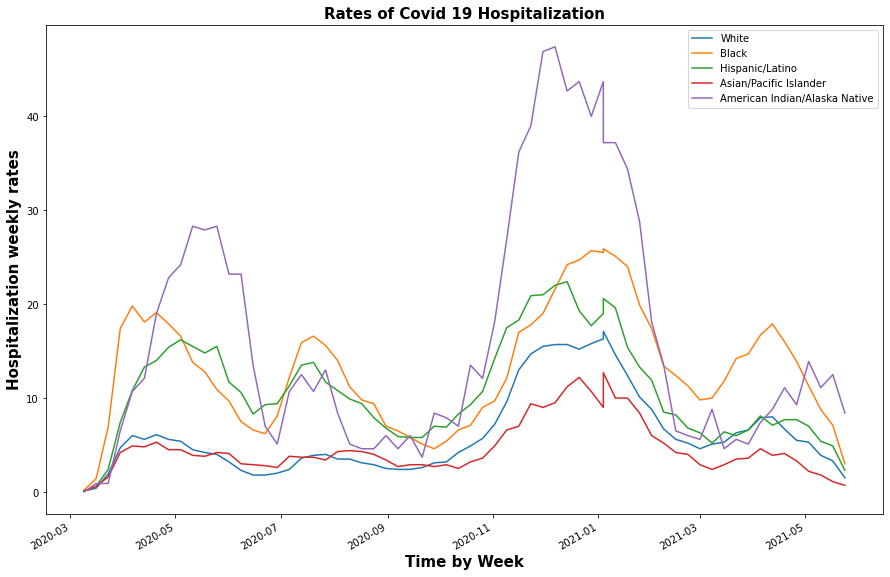

In [35]:
COUNT.plot()
plt.legend()
plt.title("Rates of Covid 19 Hospitalization", fontweight ='bold', fontsize = 15)
plt.xlabel("Time by Week", fontweight ='bold', fontsize = 15)
plt.ylabel("Hospitalization weekly rates", fontweight ='bold', fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(15, 10)